In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Upload your dataset to Google Colab
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [3]:
# Load the dataset into a DataFrame
import io
housing = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))

# Display the first few rows of the DataFrame
print(housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [4]:
# Handle categorical variable 'ocean_proximity' using one-hot encoding
housing = pd.get_dummies(housing, columns=['ocean_proximity'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
from sklearn.impute import SimpleImputer
# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform on training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform test data using the imputer fitted on training data
X_test_imputed = imputer.transform(X_test)

In [8]:
# Train the Random Forest model
rf_model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2403281345.2441363
R-squared: 0.8166006655059466


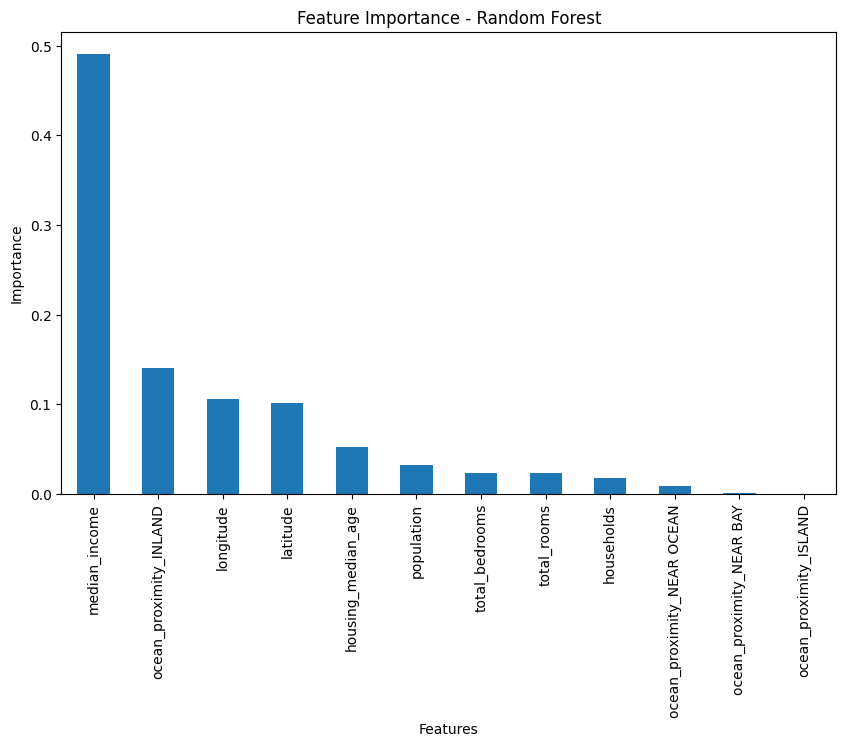

In [9]:
# Feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
sorted_feature_importance = feature_importance.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sorted_feature_importance.plot(kind='bar')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

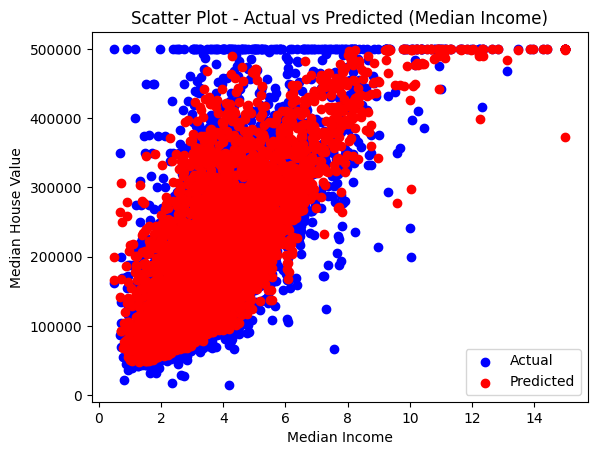

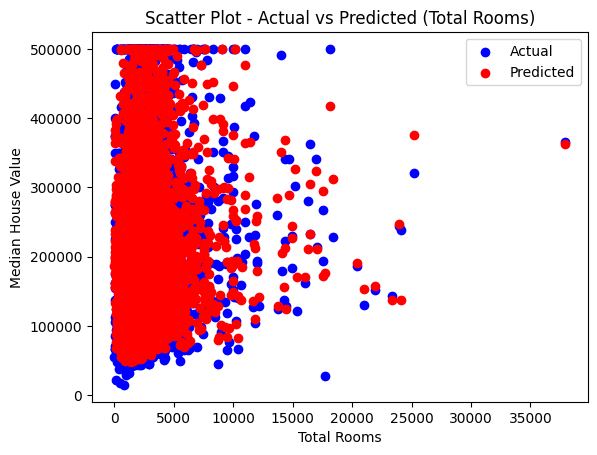

In [10]:
# Scatter plot for one feature against the target variable
plt.scatter(X_test['median_income'], y_test, color='blue', label='Actual')
plt.scatter(X_test['median_income'], y_pred, color='red', label='Predicted')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Scatter Plot - Actual vs Predicted (Median Income)')
plt.legend()
plt.show()

# Scatter plot for another feature against the target variable
plt.scatter(X_test['total_rooms'], y_test, color='blue', label='Actual')
plt.scatter(X_test['total_rooms'], y_pred, color='red', label='Predicted')
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value')
plt.title('Scatter Plot - Actual vs Predicted (Total Rooms)')
plt.legend()
plt.show()